In [1]:
import os
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

C:\Users\kimni\magiccam\Source\stargan\notebooks
C:\Users\kimni\magiccam\Source\stargan


In [2]:
%matplotlib inline

In [3]:
import plotutils

import numpy as np

import json
import imageio
import requests
import utils

In [4]:
IMAGE_PATH = '.\\dataset\\celebA\\test\\GrantGustin-2018.jpg'

HOST = '192.168.1.47'
PORT = 8501
MODEL_NAME = 'star_gan'
MODEL_VERSION = '1'

attributes = ['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young']
attributes_inv = ['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Female', 'Old']
labels = [1, 0, 0, 1, 1]

In [5]:
# [0, 255] -> [-1, 1]
def normalize(x):
    return x / 127.5 - 1


# [-1, 1] -> [0, 255]
def convert_to_imageio_accepted_range(x: np.ndarray) -> np.ndarray:
    return (x + 1.) * 127.5


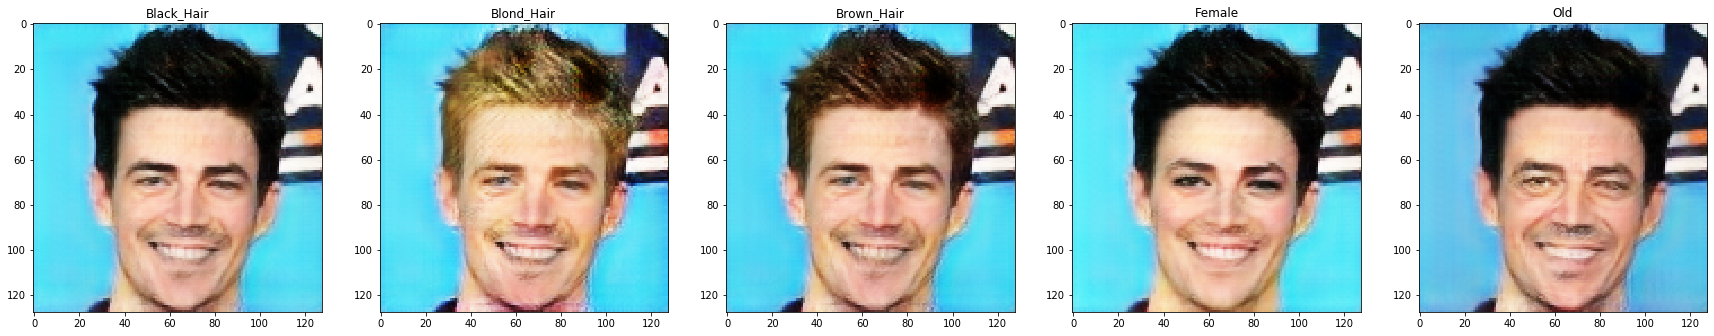

In [6]:
input_img = imageio.imread(IMAGE_PATH, pilmode='RGB')
input_img = normalize(input_img)
input_img = input_img.astype(float)
input_img = np.expand_dims(input_img, 0)

labels = np.expand_dims(labels, axis=0)
labels = utils.create_labels(labels, attributes)
labels = np.transpose(labels, axes=[1, 0, 2])

payload = {
    "inputs": {
        "custom_image": input_img.tolist(),
        "custom_label_fix_list": labels.tolist()
    }
}

# sending post request to TensorFlow Serving server
r = requests.post('http://{}:{}/v1/models/{}/versions/{}:predict'
                  .format(HOST, PORT, MODEL_NAME, MODEL_VERSION),
                  json=payload)
pred = json.loads(r.content.decode('utf-8'))
output_img = pred['outputs']  # output.shape = (5, 1, 128, 128, 3)
output_img = np.transpose(output_img, axes=[1, 0, 2, 3, 4])[0]  # (1, 5, 128, 128, 3)
output_img = convert_to_imageio_accepted_range(output_img)
output_img = output_img.astype('uint8')

plotutils.show_images(output_img, 1, attributes_inv)